In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('/Users/kanjisuo/Downloads/data/宏观经济数据.xlsx',index_col=0,header=1)

In [3]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
北 京,830.80,38103630,30671.14,127.40,5925388,64413910,434.15,10989365,15,17.30,8.56,44.94
天 津,549.74,40496103,34679.00,15.38,2045295,18253200,174.50,3254148,18,7.99,7.23,17.45
石 家庄,331.33,11981505,10008.48,8.07,493429,10444919,86.74,1067432,18,7.23,8.28,21.56
太 原,222.63,5183200,15248.11,2.43,333473,6601300,74.55,945212,16,5.06,7.88,20.58
呼和浩特,97.81,2407794,4155.10,2.00,205779,2554496,28.90,407963,18,3.81,8.92,26.58


In [4]:
col_name = data.columns

In [7]:
col_name

Index(['非农业人口数（万人)', '工业总产值（万元）  ', '货运总量（万吨） ', '批发零售住宿餐饮业从业人数（万人） ',
       '地方政府预算内收入（万元）', '城乡居民年底储蓄余额（万元） ', '在岗职工人数（万人） ', '在岗职工工资总额（万元）',
       '人均居住面积（平方米）', '每万人拥有公共汽车数（辆）', '人均拥有铺装道路面积（平方米）', '人均公共绿地面积（平方米）'],
      dtype='object')

# 因子分析求解

In [4]:
##求相关系数矩阵
R = data.corr()

In [52]:
R

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
x1,1.000000,0.684263,0.876817,0.644360,0.795327,0.844442,0.896553,0.807358,-0.023056,-0.122508,-0.082014,-0.017368
x2,0.684263,1.000000,0.789579,0.417042,0.918980,0.810867,0.633899,0.747503,0.218234,0.350092,0.423292,0.313706
x3,0.876817,0.789579,1.000000,0.442128,0.807121,0.777883,0.738361,0.715580,0.052498,-0.067218,0.003120,0.014392
x4,0.644360,0.417042,0.442128,1.000000,0.676895,0.818696,0.890287,0.896049,-0.165612,0.063370,0.025676,0.079525
x5,0.795327,0.918980,0.807121,0.676895,1.000000,0.942741,0.810753,0.902508,0.134926,0.229989,0.277727,0.203428
x6,0.844442,0.810867,0.777883,0.818696,0.942741,1.000000,0.923201,0.980417,0.025793,0.166660,0.202247,0.238935
x7,0.896553,0.633899,0.738361,0.890287,0.810753,0.923201,1.000000,0.948284,-0.066420,0.059938,0.049361,0.096356
x8,0.807358,0.747503,0.715580,0.896049,0.902508,0.980417,0.948284,1.000000,-0.010105,0.176387,0.196104,0.251352
x9,-0.023056,0.218234,0.052498,-0.165612,0.134926,0.025793,-0.066420,-0.010105,1.000000,0.310823,0.364298,0.078841
x10,-0.122508,0.350092,-0.067218,0.063370,0.229989,0.166660,0.059938,0.176387,0.310823,1.000000,0.913791,0.563520


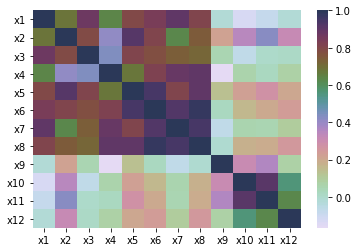

In [68]:
import seaborn as sns
cmap = sns.cubehelix_palette(start=1.5,rot=3,gamma=0.8,as_cmap=True)
sns.heatmap(data=R,cmap=cmap)

## 主成分法 

In [40]:
def pca_method(R):
    '''主成分法求解A'''
    labda,t = np.linalg.eig(R)
    labda_dic = {}
    for i in range(len(labda)):
        labda_dic[labda[i]] = t[:,i]
    sor_dic = sorted(labda_dic.items(),key=lambda d: d[0],reverse=True)
    
    #计算累计贡献率
    sum_lamda = sum(labda)
    rate =0
    lj_rate = []
    for i in sor_dic:
        rate+= i[0]
        lj_rate.append(rate/sum_lamda)
    ##90以上的贡献率我们就用这个m
    for idx in range(len(lj_rate)):
        if lj_rate[idx]>0.85:
            m = idx+1
            break
    A = []
    for l,ti in sor_dic[:m]:
        A.append(list(pow(l,0.5)*ti))
    A = np.array(A).T
    return A

In [41]:
A = pca_method(R)
A

array([[-0.87845422,  0.32510539, -0.14322359],
       [-0.85396967, -0.25397498, -0.26483954],
       [-0.8301406 ,  0.21035417, -0.33044746],
       [-0.7885342 ,  0.20307295,  0.402891  ],
       [-0.9557627 , -0.06203111, -0.12950847],
       [-0.98444113,  0.03162285,  0.05821142],
       [-0.93319057,  0.20677497,  0.14269297],
       [-0.97075064,  0.038892  ,  0.16319993],
       [-0.05876909, -0.4651357 , -0.72698015],
       [-0.20670625, -0.89837223,  0.13091836],
       [-0.24257924, -0.92693019,  0.05210351],
       [-0.24074483, -0.69836059,  0.35936545]])

In [47]:
##主成分法
labda,t = np.linalg.eig(R)
labda_dic = {}
for i in range(len(labda)):
    labda_dic[labda[i]] = t[:,i]
sor_dic = sorted(labda_dic.items(),key=lambda d: d[0],reverse=True)
#计算累计贡献率
sum_lamda = sum(labda)
rate =0
lj_rate = []
for i in sor_dic:
    rate+= i[0]
    lj_rate.append(rate/sum_lamda)
lj_rate
##m=4 ,得到A矩阵
m=3
A = []
for l,ti in sor_dic[:m]:
    A.append(list(pow(l,0.5)*ti))
A = np.array(A).T
##计算D 
D = R-np.dot(A,A.T)
print(D.shape)
#计算hi，gi
hi_lst = (A**2).sum(axis=1)
gi_lst = (A**2).sum(axis=0)/len(R)

(12, 12)


## 主因子法 

In [9]:
def zhuyinzi_method(R,way=1):
    ###主因子法
    ##初始化
    if (way==1) & (round(np.linalg.det(R),5)!=0):##要求R满秩
        R_inv = np.linalg.inv(R)
        sig_2 = 1/np.diag(R_inv)
        hi_lst = 1-sig_2
    elif way==2:
        R_temp = abs(np.array(R.copy()))
        for i in range(len(R_temp)):
            R_temp[i][i] = 0
        hi_lst = R_temp.max(axis=1)
        sig_2 = 1-hi_lst
    else :
        hi_lst = np.ones((12,1))
        sig_2 = 1-hi_lst
    ###约相关系数矩阵
    D = np.diag(sig_2)
    R_star = R-D
    ##得到主因子解
    A_hat = pca_method(R_star)
    ##得残差阵
    S = R-(D + np.dot(A_hat,A_hat.T))
    return A_hat,abs(S).sum().sum(),D

In [10]:
###主因子法
##初始化
way=2
if (way==1) & (round(np.linalg.det(R),5)!=0):##要求R满秩
    R_inv = np.linalg.inv(R)
    sig_2 = 1/np.diag(R_inv)
    hi_lst = 1-sig_2
elif way==2:
    R_temp = abs(np.array(R.copy()))
    for i in range(len(R_temp)):
        R_temp[i][i] = 0
    hi_lst = R_temp.max(axis=1)
    sig_2 = 1-hi_lst
elif way==3:
    hi_lst = np.ones((12,1))
    sig_2 = 1-hi_lst
###约相关系数矩阵
D = np.diag(sig_2)
R_star = R-D
##得到主因子解
A_hat = pca_method(R_star)
##得残差阵
S = R-(D + np.dot(A_hat,A_hat.T))

In [11]:
A_hat = zhuyinzi_method(R,way=2)
A_hat

(array([[ 0.86968713, -0.3212028 , -0.15433962],
        [ 0.84728501,  0.25675341, -0.36084642],
        [ 0.81908224, -0.2066825 , -0.3999089 ],
        [ 0.78111763, -0.19256503,  0.51011498],
        [ 0.95231139,  0.0666671 , -0.15537562],
        [ 0.98669126, -0.02767074,  0.07033932],
        [ 0.93115367, -0.2035701 ,  0.20331199],
        [ 0.97305123, -0.03418884,  0.21188089],
        [ 0.05274549,  0.36266115, -0.32739646],
        [ 0.20362557,  0.90475332,  0.12297569],
        [ 0.23900757,  0.93038083,  0.01808621],
        [ 0.22746625,  0.62610607,  0.17605899]]),
 3.0921957629090207,
 array([[0.10344729, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.        , 0.08101962, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.12318256, 

## 迭代主因子法 

In [12]:
###迭代主因子法
stop_line = 87
ss = 110
R_s = np.array(R.copy())
j = 0
while ss >stop_line:
    A_d,cc_s,D = zhuyinzi_method(R_s,way=2)
    ss = abs(cc_s)
    R_s = np.dot(A_d,A_d.T)+D
A_d

array([[ 0.86968713, -0.3212028 , -0.15433962],
       [ 0.84728501,  0.25675341, -0.36084642],
       [ 0.81908224, -0.2066825 , -0.3999089 ],
       [ 0.78111763, -0.19256503,  0.51011498],
       [ 0.95231139,  0.0666671 , -0.15537562],
       [ 0.98669126, -0.02767074,  0.07033932],
       [ 0.93115367, -0.2035701 ,  0.20331199],
       [ 0.97305123, -0.03418884,  0.21188089],
       [ 0.05274549,  0.36266115, -0.32739646],
       [ 0.20362557,  0.90475332,  0.12297569],
       [ 0.23900757,  0.93038083,  0.01808621],
       [ 0.22746625,  0.62610607,  0.17605899]])

In [13]:
def diedai_method(stop_line,R):
    '''
    迭代主因子法
    '''
    stop_line = 100
    ss = 110
    R_s = np.array(R.copy())
    j = 0
    while ss >stop_line:
        A_d,cc_s,D = zhuyinzi_method(R_s,way=2)
        ss = abs(cc_s)
        R_s = np.dot(A_d,A_d.T)+D
    return A_d,D

In [14]:
A_d,D = diedai_method(100,R)

In [15]:
A_d

array([[ 0.86968713, -0.3212028 , -0.15433962],
       [ 0.84728501,  0.25675341, -0.36084642],
       [ 0.81908224, -0.2066825 , -0.3999089 ],
       [ 0.78111763, -0.19256503,  0.51011498],
       [ 0.95231139,  0.0666671 , -0.15537562],
       [ 0.98669126, -0.02767074,  0.07033932],
       [ 0.93115367, -0.2035701 ,  0.20331199],
       [ 0.97305123, -0.03418884,  0.21188089],
       [ 0.05274549,  0.36266115, -0.32739646],
       [ 0.20362557,  0.90475332,  0.12297569],
       [ 0.23900757,  0.93038083,  0.01808621],
       [ 0.22746625,  0.62610607,  0.17605899]])

# 因子旋转

## 计算V 

In [21]:
A = A_d

In [22]:
##因子旋转
hi_2lst = (A**2).sum(axis=1)
hi_lst = pow(hi_2lst,0.5)

In [23]:
d = np.zeros_like(A)
for i in range(len(d)):
    for j in range(d.shape[1]):
        d[i][j] = A[i][j]/hi_lst[i]
d

array([[ 0.92533121, -0.34175391, -0.16421453],
       [ 0.88623856,  0.26855753, -0.37743618],
       [ 0.87636694, -0.22113739, -0.4278776 ],
       [ 0.81998646, -0.20214716,  0.53549858],
       [ 0.98460268,  0.06892767, -0.16064415],
       [ 0.99707862, -0.02796204,  0.07107982],
       [ 0.95543216, -0.2088779 ,  0.20861306],
       [ 0.97652845, -0.03431101,  0.21263805],
       [ 0.1073328 ,  0.73798611, -0.66622532],
       [ 0.21766437,  0.96713082,  0.13145415],
       [ 0.24876922,  0.96837983,  0.01882489],
       [ 0.33013083,  0.9086927 ,  0.25552144]])

In [24]:
dj_bar_lst = (d**2).sum(axis=0)/d.shape[0]
dj_bar_lst

array([0.59515756, 0.29770597, 0.10713647])

In [25]:
###相对方差
V_lst = np.zeros(len(dj_bar_lst))
for j in range(d.shape[1]):
    Vj = 0
    for i in range(d.shape[0]):
        Vj+= (d[i][j]**2-dj_bar_lst[j])**2
    V_lst[j] = Vj/d.shape[0]


In [26]:
V_lst

array([0.15252954, 0.14116467, 0.0171026 ])

In [27]:
sum(V_lst)

0.3107968087860894

In [28]:
from factor_analyzer import Rotator

In [29]:
def compute_V(A):
    '''
    计算方差V'''
    hi_2lst = (A**2).sum(axis=1)
    hi_lst = pow(hi_2lst,0.5)
    d = np.zeros_like(A)
    for i in range(len(d)):
        for j in range(d.shape[1]):
            d[i][j] = A[i][j]/hi_lst[i]
    dj_bar_lst = (d**2).sum(axis=0)/d.shape[0]
    ###相对方差
    V_lst = np.zeros(len(dj_bar_lst))
    for j in range(d.shape[1]):
        Vj = 0
        for i in range(d.shape[0]):
            Vj+= (d[i][j]**2-dj_bar_lst[j])**2
        V_lst[j] = Vj/d.shape[0]

    return sum(V_lst)

## 旋转 

In [42]:
rotator = Rotator()
new_A_d = rotator.fit_transform(A)
new_A_d

array([[-0.92898419,  0.18254866, -0.0394042 ],
       [-0.80573831, -0.30982546, -0.34453073],
       [-0.8700605 ,  0.14626641, -0.25333509],
       [-0.79110136, -0.09140043,  0.43720769],
       [-0.93382038, -0.19518662, -0.15486869],
       [-0.96960017, -0.17491931,  0.05283619],
       [-0.9468826 , -0.03048239,  0.1909083 ],
       [-0.95221227, -0.19978791,  0.15453216],
       [-0.00959082, -0.20537489, -0.84025849],
       [-0.03307072, -0.91395627, -0.17472842],
       [-0.0670592 , -0.92150984, -0.25900141],
       [-0.09141206, -0.80940606,  0.10637102]])

In [43]:
compute_V(new_A_d)

0.4015542180577507

In [44]:
pd.DataFrame(new_A_d,index=data.columns,columns=['f1','f2','f3'])

,f1,f2,f3
x1,-0.928984,0.182549,-0.039404
x2,-0.805738,-0.309825,-0.344531
x3,-0.870061,0.146266,-0.253335
x4,-0.791101,-0.091400,0.437208
x5,-0.933820,-0.195187,-0.154869
x6,-0.969600,-0.174919,0.052836
x7,-0.946883,-0.030482,0.190908
x8,-0.952212,-0.199788,0.154532
x9,-0.009591,-0.205375,-0.840258
x10,-0.033071,-0.913956,-0.174728


# 计算因子得分

## 加权最小二乘 

In [33]:
###计算因子得分
##加权最小二乘
np.array(data).sum(axis=0)/data.shape[0]

array([3.08348857e+02, 1.66968571e+07, 1.47487680e+04, 1.17157143e+01,
       1.21711729e+06, 1.28727804e+07, 1.00153714e+02, 1.87219411e+06,
       1.70857143e+01, 1.33925714e+01, 9.11342857e+00, 3.77782857e+01])

In [34]:
u_lst = np.array(data).sum(axis=0)/data.shape[0]
A,D_hat = diedai_method(stop_line=87,R=R)
D_hat_inv = np.linalg.inv(D_hat)
ii = np.dot(np.dot(A.T,D_hat_inv),A)
ii_inv = np.linalg.inv(ii)
f_hat = np.dot(np.dot(ii_inv,A.T),D_hat_inv)

In [35]:
zyinzi_data = pd.DataFrame(np.dot(f_hat,(np.array(data)-u_lst).T).T,index=data.index,columns=['f1','f2','f3'])

In [36]:
zyinzi_data###因子得分

,f1,f2,f3
北 京,2.162828e+07,2.099712e+06,-7.646262e+06
天 津,4.791355e+06,2.968989e+06,-1.297318e+07
石 家庄,-1.591531e+06,-5.916616e+05,2.405593e+06
太 原,-3.610154e+06,-1.405247e+06,6.318265e+06
呼和浩特,-5.351320e+06,-1.697567e+06,7.587954e+06
沈 阳,-3.822375e+05,-8.063355e+05,3.351302e+06
长 春,-1.880613e+06,-1.658803e+05,7.891811e+05
哈 尔 滨,-1.472536e+06,-1.210173e+06,5.835225e+06
上 海,2.714592e+07,1.059274e+07,-4.879655e+07
南 京,4.794050e+05,1.095928e+06,-4.798104e+06


## 回归法 

In [71]:
A= -A

In [72]:
A

array([[ 0.87845422, -0.32510539,  0.14322359],
       [ 0.85396967,  0.25397498,  0.26483954],
       [ 0.8301406 , -0.21035417,  0.33044746],
       [ 0.7885342 , -0.20307295, -0.402891  ],
       [ 0.9557627 ,  0.06203111,  0.12950847],
       [ 0.98444113, -0.03162285, -0.05821142],
       [ 0.93319057, -0.20677497, -0.14269297],
       [ 0.97075064, -0.038892  , -0.16319993],
       [ 0.05876909,  0.4651357 ,  0.72698015],
       [ 0.20670625,  0.89837223, -0.13091836],
       [ 0.24257924,  0.92693019, -0.05210351],
       [ 0.24074483,  0.69836059, -0.35936545]])

In [73]:
###回归法求因子得分
R_inv = np.linalg.inv(R)
fj_hat = np.dot(A.T,R_inv)

In [76]:
hg_score_data = pd.DataFrame(np.dot(fj_hat,np.array(data).T).T,index=data.index,columns=['f1','f2','f3'])

In [77]:
hg_score_data

,f1,f2,f3
北 京,1.683626e+07,2.831188e+06,4.811767e+06
天 津,8.649054e+06,3.626219e+06,8.499763e+06
石 家庄,3.302636e+06,1.009148e+06,2.220953e+06
太 原,1.825023e+06,4.068262e+05,7.972688e+05
呼和浩特,7.746184e+05,1.969113e+05,4.069603e+05
沈 阳,3.802055e+06,8.377728e+05,1.673353e+06
长 春,3.410272e+06,1.328441e+06,3.053146e+06
哈 尔 滨,3.042864e+06,5.349558e+05,9.019098e+05
上 海,2.453638e+07,9.154648e+06,2.139944e+07
南 京,5.366793e+06,2.250495e+06,5.284689e+06


# 调包进行因子分析

In [45]:
from factor_analyzer import FactorAnalyzer

In [69]:

fa_5 = FactorAnalyzer(rotation=None, n_factors=3, method='principal')
fa_5.fit(data)
fa_15_sd = fa_5.get_factor_variance()
fa_15_df = pd.DataFrame(
    {'特征值': fa_15_sd[0], '方差贡献率': fa_15_sd[1], '方差累计贡献率': fa_15_sd[2]})

#各个因子的特征值以及方差贡献率
print("\n",fa_15_df)

    #查看公因子提取度
print("\n公因子提取度:\n",fa_5.get_communalities())

#查看因子载荷
print("\n因子载荷矩阵:\n",fa_5.loadings_)

#使用最大方差法旋转因子载荷矩阵

rotation=Rotator('varimax')
A_new = rotation.fit_transform(fa_5.loadings_)

#查看旋转后的因子载荷
print("\n旋转后的因子载荷矩阵:\n",A_new)

# 因子得分（回归方法）（系数矩阵的逆乘以因子载荷矩阵）
X1 = np.mat(R)
X1 = np.linalg.inv(X1)


#B=(R-1)*A  15*5
factor_score = np.dot(X1,A_new)
factor_score = pd.DataFrame(factor_score)
factor_score.columns = ['factor1', 'factor2', 'factor3']
factor_score.index = R.columns
print("\n因子得分：\n", factor_score)

#F=XB  27*15 15*5=  27 5
fa_t_score = np.dot(np.mat(data), np.mat(factor_score))
print("\n应试者的五个因子得分：\n",pd.DataFrame(fa_t_score))



         特征值     方差贡献率   方差累计贡献率
0  6.670658  0.555888  0.555888
1  2.675132  0.222928  0.778816
2  1.106824  0.092235  0.871051

公因子提取度:
 [0.89788833 0.86390746 0.84257781 0.82534597 0.93410264 0.97351292
 0.93396181 0.97050361 0.74830515 0.86693976 0.92075904 0.67480912]

因子载荷矩阵:
 [[ 0.87845422 -0.32510539  0.14322359]
 [ 0.85396967  0.25397498  0.26483954]
 [ 0.8301406  -0.21035417  0.33044746]
 [ 0.7885342  -0.20307295 -0.402891  ]
 [ 0.9557627   0.06203111  0.12950847]
 [ 0.98444113 -0.03162285 -0.05821142]
 [ 0.93319057 -0.20677497 -0.14269297]
 [ 0.97075064 -0.038892   -0.16319993]
 [ 0.05876909  0.4651357   0.72698015]
 [ 0.20670625  0.89837223 -0.13091836]
 [ 0.24257924  0.92693019 -0.05210351]
 [ 0.24074483  0.69836059 -0.35936545]]

旋转后的因子载荷矩阵:
 [[ 0.92898419 -0.18254866  0.0394042 ]
 [ 0.80573831  0.30982546  0.34453073]
 [ 0.8700605  -0.14626641  0.25333509]
 [ 0.79110136  0.09140043 -0.43720769]
 [ 0.93382038  0.19518662  0.15486869]
 [ 0.96960017  0.17491931 -0.05283619